In [ ]:
#Carrie Gold
#BMI 6030
#Module 13 

#Using one of the three datasets to demonstrate k-means clustering using the 
#scikit learn package (50 points). Be sure to review the readings before you 
#start on this assignment. Calculate the sum of least square error for each 
#different values of 'k'. Using Matplotlib determine the optimal number of 
#clusters (k) using the elbow method along with a brief explanation (50 points).
#Finally plot the optimal clusters with their centroids along with a brief 
#explanation (50 points). Comment your code as needed.

#Import data
#Choose two variables
#Create a scatter plot with Seaborn
#Calculate the sum of least square error 

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib as mp 
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

In [3]:
#Uploading data
d_data = pd.read_csv("diabetic_data.csv")
d_data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [4]:
#Visualizing the data
#plt.figure(figsize=(20,20))
#sns.scatterplot(data=d_data, x='num_lab_procedures', y='num_medications', hue='number_diagnoses')
#plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Splitting the data set 
X_train, X_test, y_train, y_test = train_test_split(d_data[['num_lab_procedures', 'num_medications']], 
                                                    d_data[['number_diagnoses']], test_size=0.33, 
                                                    random_state=0)

#Normalizing the training and testing data
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init=10)
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

In [8]:
#Start clusters
#plt.figure(figsize=(20,20))
#sns.scatterplot(data= X_train, x='num_lab_procedures', y='num_medications', hue= kmeans.labels_)
#plt.show()

In [7]:
from sklearn.metrics import silhouette_score

In [8]:
silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.6069518299545764

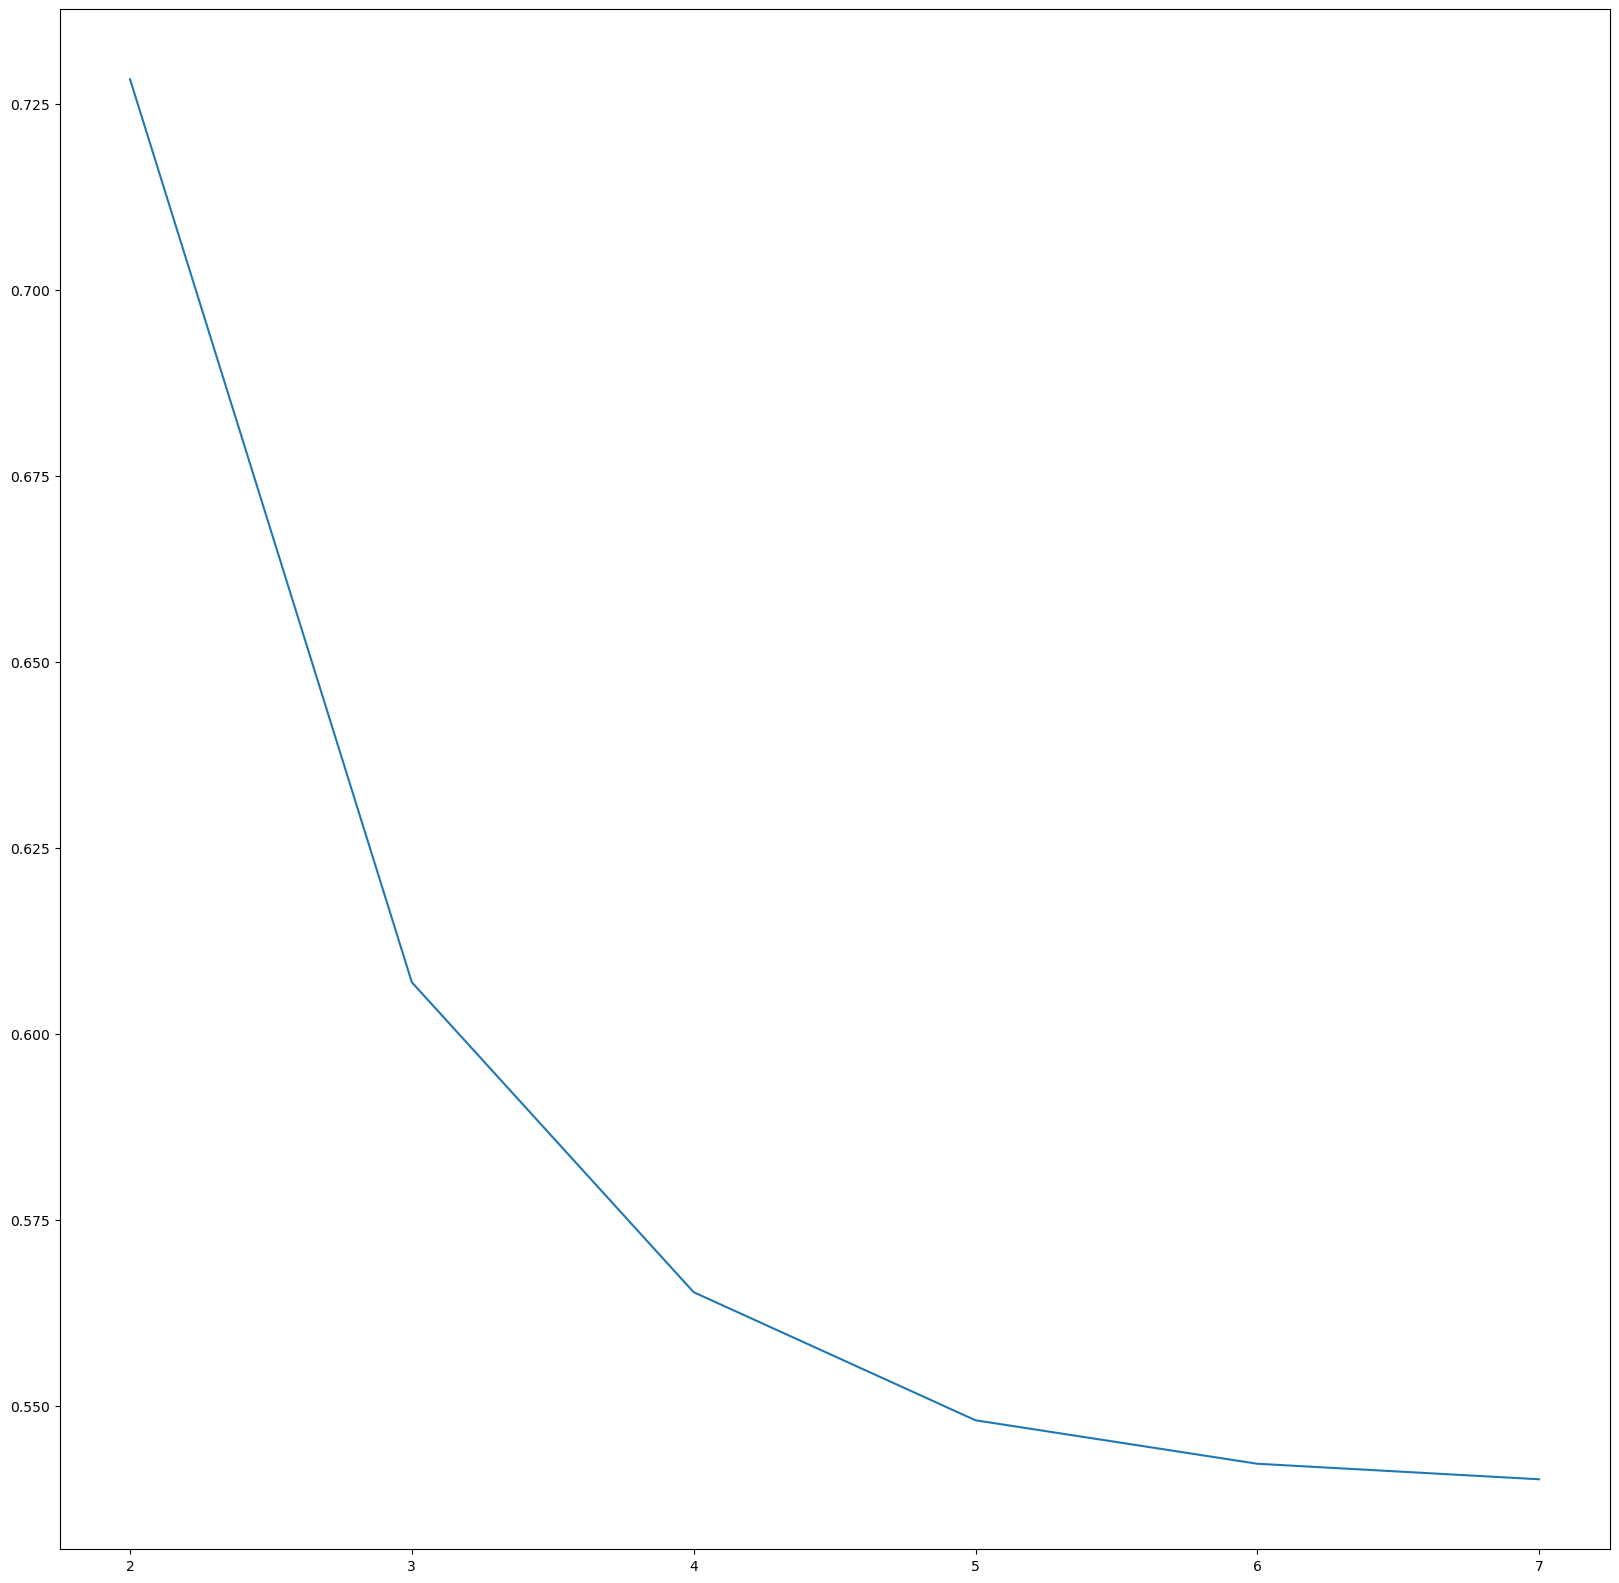

In [9]:
#Elbow method to estimate optimal number of clusters
K = range(2, 8)
fits = []
score = []

for k in K:
    model = KMeans(n_clusters = k, random_state = 0, n_init=10).fit(X_train_norm)
    
    fits.append(model)
    
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))
    
plt.figure(figsize=(20, 20))
sns.lineplot(x = K, y = score)
plt.show()

In [ ]:
#The elbow method is a way to estimate the optimal number of clusters, determined by where the 
#rate of decrease slows down and the graph starts to level out. I am going to try 3 clusters.

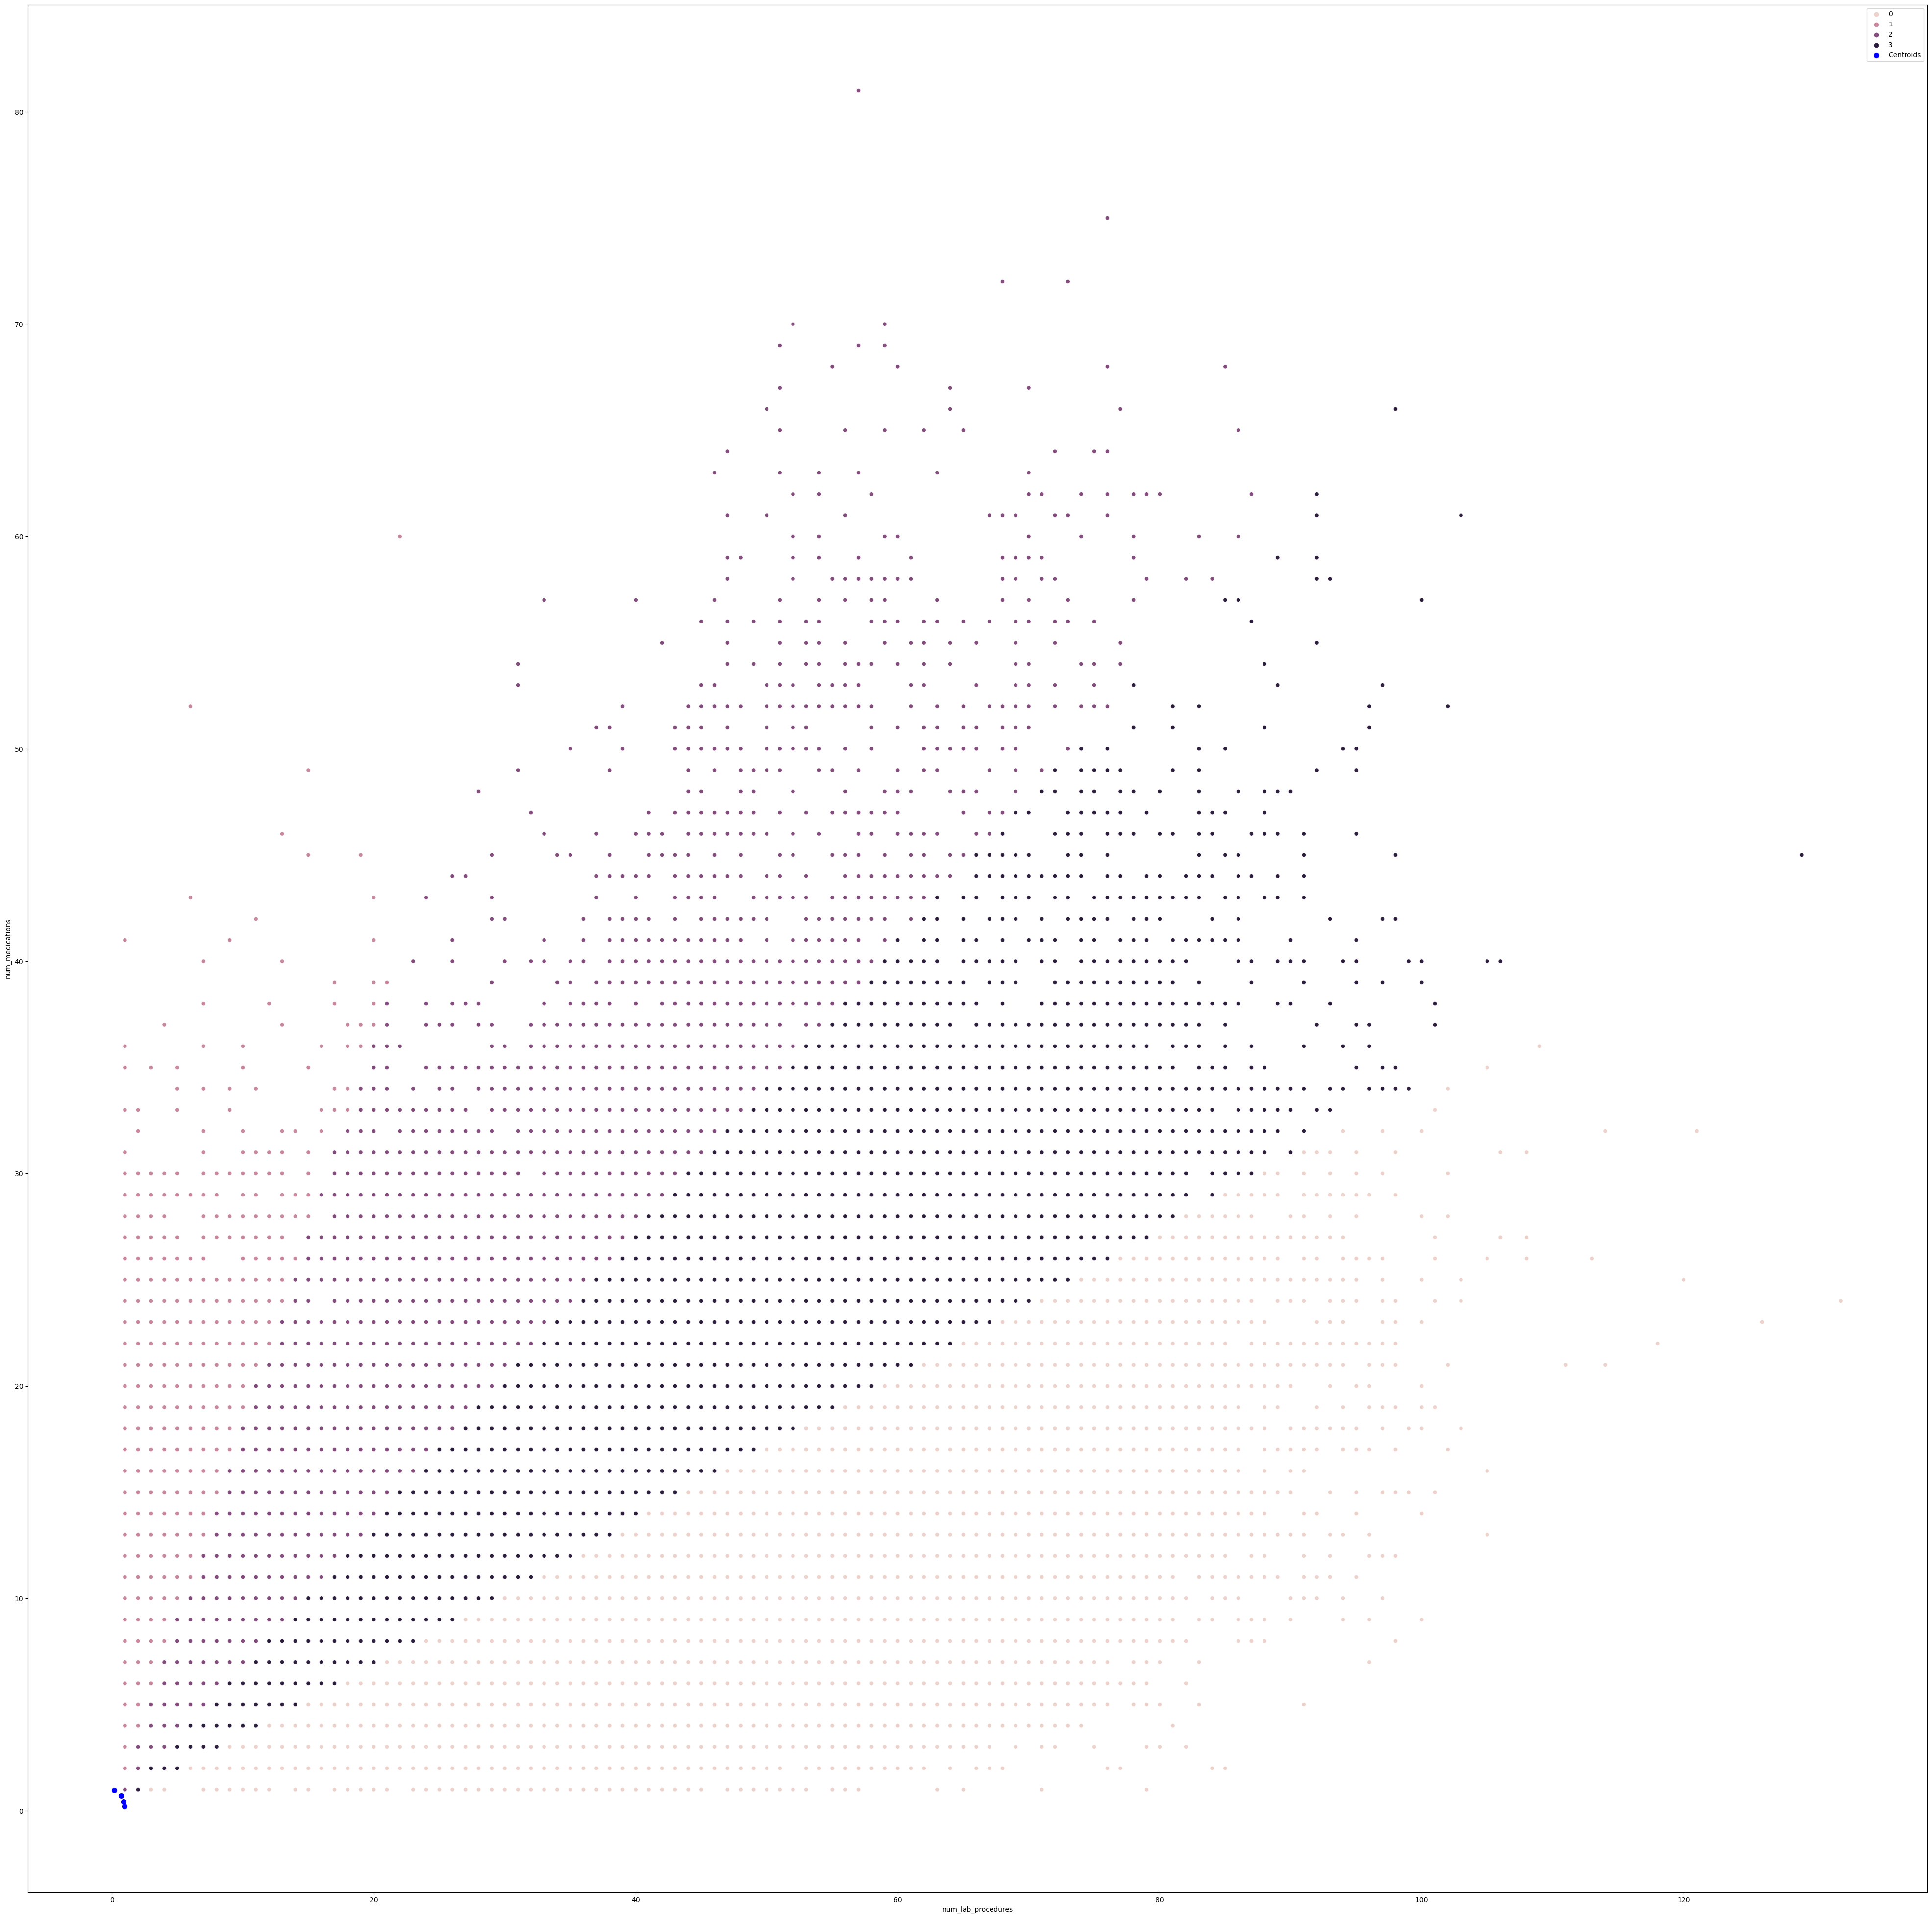

In [14]:
#Plotting the clusters with centroids
plt.figure(figsize=(50,50))
centroids = fits[2].cluster_centers_
sns.scatterplot(data = X_train, x='num_lab_procedures', y='num_medications', hue = fits[2].labels_)
plt.scatter(centroids[:, 0], centroids[:, 1], color= 'blue',label= 'Centroids', s=50)
plt.legend()
plt.show()